In [1]:
cd C:\Users\billy\Desktop\billy_job_application\Dymon_Asia

C:\Users\billy\Desktop\billy_job_application\Dymon_Asia


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
prices = pd.read_excel('prices.xlsx')

In [4]:
prices.head(5)

,Date,FB US Equity,AAPL US Equity,AMZN US Equity,NFLX US Equity,GOOG US Equity
0,2018-12-31,131.09,39.435,1501.97,267.66,1035.61
1,2019-01-02,135.68,39.480,1539.13,267.66,1045.85
2,2019-01-03,131.74,35.548,1500.28,271.20,1016.06
3,2019-01-04,137.95,37.065,1575.39,297.57,1070.71
4,2019-01-07,138.05,36.983,1629.51,315.34,1068.39


In [5]:
FB = prices["FB US Equity"]
AAPL = prices["AAPL US Equity"]
AMZN = prices["AMZN US Equity"]
NFLX = prices["NFLX US Equity"]
GOOG = prices["GOOG US Equity"]
print(FB)

0      131.09
1      135.68
2      131.74
3      137.95
4      138.05
        ...  
501    267.40
502    277.00
503    276.78
504    271.87
505    273.16
Name: FB US Equity, Length: 506, dtype: float64


In [ ]:
# Q1 

In [6]:
FB_daily_returns = FB.pct_change()
AAPL_daily_returns = AAPL.pct_change()
AMZN_daily_returns = AMZN.pct_change()
NFLX_daily_returns = NFLX.pct_change()
GOOG_daily_returns = GOOG.pct_change()

In [ ]:
# Q2 

In [7]:
combined_returns = pd.concat([FB_daily_returns, AAPL_daily_returns,AMZN_daily_returns,NFLX_daily_returns,GOOG_daily_returns], axis=1)
print(combined_returns)
corrMatrix = combined_returns.corr()
print(corrMatrix)

     FB US Equity  AAPL US Equity  AMZN US Equity  NFLX US Equity  \
0             NaN             NaN             NaN             NaN   
1        0.035014        0.001141        0.024741        0.000000   
2       -0.029039       -0.099595       -0.025242        0.013226   
3        0.047138        0.042675        0.050064        0.097235   
4        0.000725       -0.002212        0.034353        0.059717   
..            ...             ...             ...             ...   
501     -0.002648        0.007712       -0.003949       -0.000991   
502      0.035901        0.035766        0.035071        0.010020   
503     -0.000794       -0.013315        0.011584        0.022634   
504     -0.017740       -0.008527       -0.010882       -0.011830   
505      0.004745       -0.007703       -0.008801        0.030767   

     GOOG US Equity  
0               NaN  
1          0.009888  
2         -0.028484  
3          0.053786  
4         -0.002167  
..              ...  
501        0.0037

In [ ]:
# Q3 

In [8]:
average_return = combined_returns.mean()
print(average_return)

FB US Equity      0.001741
AAPL US Equity    0.002690
AMZN US Equity    0.001732
NFLX US Equity    0.001723
GOOG US Equity    0.001245
dtype: float64


In [9]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])
portfolio_mean = average_return.dot(weights)
print(portfolio_mean)

0.0018260773980859008


In [10]:
CoVarMatrix = combined_returns.cov()
print(CoVarMatrix)
portfolio_SD = (weights @ CoVarMatrix @ weights.T) ** (0.5)
print(portfolio_SD)

                FB US Equity  AAPL US Equity  AMZN US Equity  NFLX US Equity  \
FB US Equity        0.000572        0.000394        0.000318        0.000321   
AAPL US Equity      0.000394        0.000567        0.000319        0.000308   
AMZN US Equity      0.000318        0.000319        0.000399        0.000324   
NFLX US Equity      0.000321        0.000308        0.000324        0.000661   
GOOG US Equity      0.000356        0.000337        0.000266        0.000260   

                GOOG US Equity  
FB US Equity          0.000356  
AAPL US Equity        0.000337  
AMZN US Equity        0.000266  
NFLX US Equity        0.000260  
GOOG US Equity        0.000407  
0.018984007580331416


In [11]:
x = np.arange(-0.05,0.05,0.001)
normal_distribution = norm.pdf(x,portfolio_mean,portfolio_SD)

In [12]:
confidence_interval = 0.01 
VaR = norm.ppf(confidence_interval,portfolio_mean,portfolio_SD)
VaR
print('The 99% 1-day V@R', -100* VaR , '%')
# since VaR is assume as a negative value, so i multiple -1 in the conclusion

The 99% 1-day V@R 4.233732827719329 %


In [ ]:
# Q4

In [13]:
port_return = combined_returns @ weights
port_return
cumulative_ret = (port_return + 1).cumprod()
cumulative_ret

0           NaN
1      1.014157
2      0.979851
3      1.036859
4      1.055608
         ...   
501    2.242778
502    2.304757
503    2.309518
504    2.281852
505    2.293769
Length: 506, dtype: float64

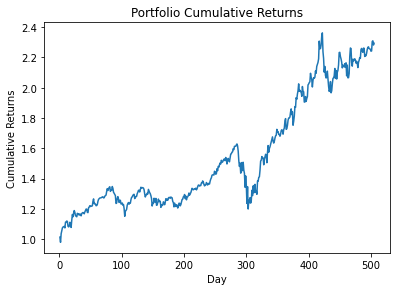

In [14]:
Cum_result_fig = plt.figure()
ax1 = Cum_result_fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Day')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();

In [ ]:
# Q5

In [15]:
occurrences_1 = (port_return < -0.01).sum()
occurrences_2 = ((port_return > -0.01) & (port_return < -0.005)).sum()
occurrences_3 = ((port_return > -0.005) & (port_return < 0)).sum()
occurrences_4 = ((port_return > 0) & (port_return < 0.005)).sum()
occurrences_5 = ((port_return > 0.005) & (port_return < 0.01)).sum()
occurrences_6 = (port_return > 0.01).sum()
sum_occurrence = len(port_return)-1

In [16]:
from prettytable import PrettyTable 
myTable = PrettyTable(["     ","Ret < -1% ", "-1% < Ret < -0.5%", "-0.5% < Ret < 0%", "0% < Ret < 0.5% ", " 0.5% < Ret < 1% ", " Ret > 1%"]) 
myTable.add_row(["# of Events",occurrences_1, occurrences_2, occurrences_3,occurrences_4,occurrences_5,occurrences_6]) 
myTable.add_row(["% of Events",round((occurrences_1/sum_occurrence*100),2), round((occurrences_2/sum_occurrence*100),2)
                 , round((occurrences_3/sum_occurrence*100),2),round((occurrences_4/sum_occurrence*100),2)
                 ,round((occurrences_5/sum_occurrence*100),2),round((occurrences_6/sum_occurrence*100),2)]) 
print(myTable)

+-------------+------------+-------------------+------------------+------------------+-------------------+-----------+
|             | Ret < -1%  | -1% < Ret < -0.5% | -0.5% < Ret < 0% | 0% < Ret < 0.5%  |  0.5% < Ret < 1%  |  Ret > 1% |
+-------------+------------+-------------------+------------------+------------------+-------------------+-----------+
| # of Events |     94     |         52        |        56        |        91        |         70        |    142    |
| % of Events |   18.61    |        10.3       |      11.09       |      18.02       |       13.86       |   28.12   |
+-------------+------------+-------------------+------------------+------------------+-------------------+-----------+


<BarContainer object of 6 artists>

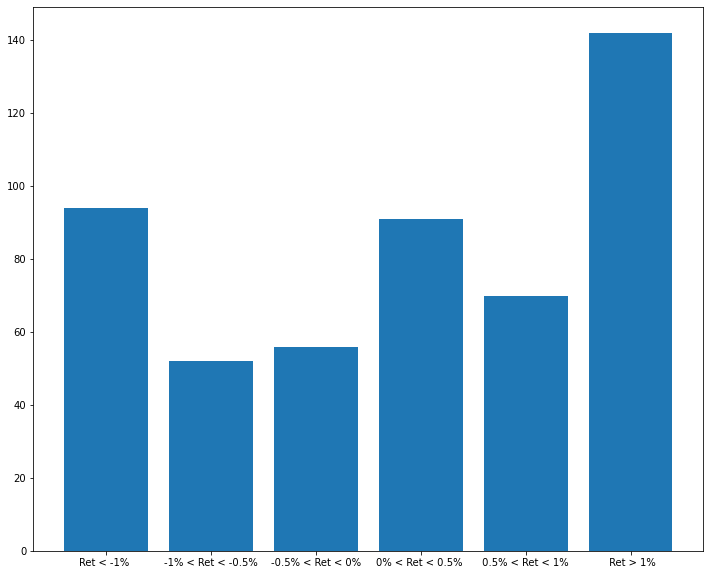

In [17]:
marks=[occurrences_1,occurrences_2,occurrences_3,occurrences_4,occurrences_5,occurrences_6]
bars=('Ret < -1% ','-1% < Ret < -0.5%','-0.5% < Ret < 0%', "0% < Ret < 0.5% ", " 0.5% < Ret < 1% ", " Ret > 1%")
Cum_result_fig = plt.figure(figsize=(12,10))
plt.bar(bars,marks)